# Motion Recognition


In This code, we will detect the number of people walking in a video.

# Imports

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
# read the video
cap = cv2.VideoCapture('people3.mp4')

frames_with_rectangles = []
frames_with_rectangles_number = []

while cap.isOpened():
   # We read 2 frames because we want to know if some objects (pixels) change in the video.
   # The changed pixels will mean that the object is moving.
   ret, frame1 = cap.read()
   ret, frame2 = cap.read()

   # if there are no frames left (we finished the video)
   # return false. so we break
   if not ret:
      break

   # We get the difference from the 2 frames.
   # We use absolute difference so that there are no -ve values
   diff = cv2.absdiff(frame1, frame2)

   img = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
   # plt.imshow(img, cmap='gray')


   # A countour is a whole object
   # Unlike in edge detection, where we detect edges only,
   # or in corner detection where we detect corners only.
   # Using contours we detect whole objects in the image.
   contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

   num_rectangles = 0

   for contour in contours:
      (x, y, w, h) = cv2.boundingRect(contour)

      # if the contour (object) area is less than 900 then skip and dont
      # draw a rectangle on it
      if cv2.contourArea(contour) < 1000:
         continue


      # (0, 255, 0) is the rectangle color
      # 3 is the rectangle thickness
      cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 3)
      # plt.imshow(frame1)
      num_rectangles += 1



   frames_with_rectangles.append(frame1)
   frames_with_rectangles_number.append(num_rectangles)




cv2.destroyAllWindows()
cap.release()

61


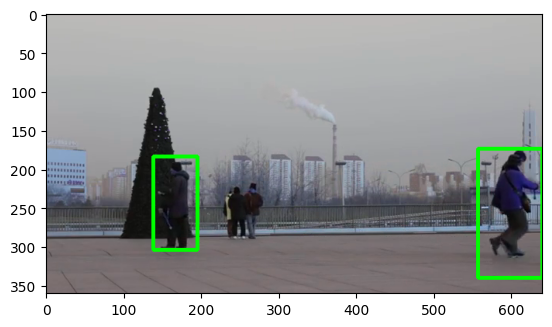

In [ ]:
plt.imshow(frames_with_rectangles[50])
print(len(frames_with_rectangles))

In [ ]:
# Plot the frames with drawn rectangles in subplots
num_frames = len(frames_with_rectangles)
rows = (num_frames + 2) // 3  # Calculate the number of rows needed

figure, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))

for i, frame in enumerate(frames_with_rectangles):
    row_index = i // 3
    col_index = i % 3
    axes[row_index, col_index].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    axes[row_index, col_index].set_title(f'Frame {i + 1} - Number of people: {frames_with_rectangles_number[i]}')

# Remove any empty subplots if the number of frames is not a multiple of 3
if num_frames % 3 != 0:
    for j in range(num_frames % 3, 3):
        figure.delaxes(axes[rows - 1, j])

plt.show()

Output hidden; open in https://colab.research.google.com to view.